In [3]:
from pprint import pprint
import pandas as pd
import numpy as np
from logger import log
from corpgame import PolymatrixGame
from corpgame import GameManager
import random
import networkx as nx

Notation from Cai et al 2016

G: A finite set $V = \{ 1, 2, ..., n\}$ of players (nodes), and a finite set $E$ of interactions (edges) which are taken to be unordered pairs $[i,j]$ with $i \neq j$

G: For each player $i \in V$, a finite set of strategies $S_i$ with no requirement on size other than $|S_i| \leq 1$.
S: In our case, a natural number $k$ of the amount of strategies available fore every player such that $\forall_i |S_i|=k$ and furthermore all players have equivalent strategy sets to choose from such that $\forall_{[i,j]} S_i = S_j$.

G: For each interaction $[i,j] \in E$, a two-person game $(p^{ij},p^{ji})$ with payoff $p^{ij}:S_i x S_j \longmapsto R $.
S: Two-person game payoffs are always zero-sum such that $p^{ij}=-p^{ji}$.

G: For each player $i \in V$ and strategy profile $\bar{s} = \{ s_1, ..., s_n\}$, payoff of player $i$ is $p_i(\bar{s}) = \sum _{[i,j] \in E} p^{ij}(s_i,s_j)$.
S: In our case, if $s_i=s_j$ then $p^{ij}=p^{ji}=0$ 

In [7]:
games = [
    [[4,4],[2,6],[10,0]],
    [[6,4],[2,6],[10,10]],
    [[11,2],[14,7],[20,12]],
    [[20,60],[100,0],[30,30],[17,13],[10,53]],
    [[7, 26], [30, 75], [12, 38], [15, 21],[8,0]],
]

In [3]:
# trying out some configurations
n=100
for i in range(n):
    game_settings = {
            "start_populations_matrix": [[11,2],[14,7],[20,12]],
            "topology": "fully_connected",
            'alpha': (i+1)/n,
            'log_level': "error"
        }
    game = PolymatrixGame(**game_settings)
    game.solve()
    #pprint(game.payoffs)
    pprint(len(game.pne))

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [20]:
populations = [[[11,2],[14,7],[20,12]],[[11,2],[14,7],[20,12]],[[2,6],[10,0],[3,3],[1,1]],[[2,6],[3,7],[3,3]],[[20,60],[100,0],[30,30],[17,13],[10,53]]]
n=50
X = [(x+1)/n for x in list(range(n))]
results = {i:[] for i in range(len(populations))}
for i, population in enumerate(populations):
    for x in X:
        game_settings = {
                "start_populations_matrix": population,
                "topology": "fully_connected",
                'alpha': x,
                'log_level': "error"
            }
        game = PolymatrixGame(**game_settings)
        game.solve()
        results[i].append(len(game.pne))
    print(i)



defaultdict(None, {1: 3})

In [8]:
#populations = [[[11,2],[14,7],[20,12]],[[2,6],[10,0],[3,3],[1,1]],[[2,6],[3,7],[3,3]],[[20,60],[100,0],[30,30],[17,13],[10,53]]]
populations = games
n=50
X = [(x+1)/n for x in list(range(n))]
results = {i:[] for i in range(len(populations))}
for i, population in enumerate(populations):
    for x in X:
        game_settings = {
                "start_populations_matrix": population,
                "topology": "fully_connected",
                'alpha': x,
                'log_level': "error"
            }
        game = PolymatrixGame(**game_settings)
        game.solve()
        results[i].append(len(game.pne))
    print(i)



0
1
2
3
4


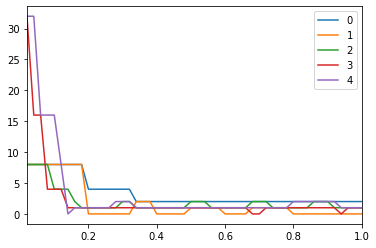

In [16]:
df = pd.DataFrame(results, index=X)

pd.DataFrame(df).plot.line()

In [12]:
# trying out some configurations
for beta in range(12):
    game_settings = {
            "start_populations_matrix": [[beta,4],[2,6],[10,0],[3,3]],
            "topology": "fully_connected",
            'alpha': 1.0,
            'log_level': "error"
        }
    game = PolymatrixGame(**game_settings)
    game.solve()
    print(beta, game.pne)

0 {'1101': [0.0, 0.0, 1.0, -1.0]}
1 {'1101': [0.0, 0.0, 1.0, -1.0]}
2 {'1101': [0.0, 0.0, 1.0, -1.0]}
3 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0], '1100': [-1.0, 1.0, 1.0, -1.0], '1101': [-1.0, 0.0, 2.0, -1.0]}
4 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0], '1100': [-1.0, 1.0, 1.0, -1.0], '1101': [-1.0, 0.0, 2.0, -1.0]}
5 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0], '1100': [-1.0, 1.0, 1.0, -1.0], '1101': [-1.0, 0.0, 2.0, -1.0]}
6 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0]}
7 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0]}
8 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0]}
9 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0]}
10 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0]}
11 {'0100': [-1.0, 2.0, 0.0, -1.0], '0101': [-1.0, 1.0, 1.0, -1.0]}


In [24]:
# trying out some configurations
game_settings = {
        "start_populations_matrix": [[0,0],[4,4],[8,8],[3,3]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
pprint(game.actions)

{'0000': {'payoff': [0.0, 0.0, 0.0, 0.0],
          'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
          'pure_nash': False},
 '0001': {'payoff': [1.0, 0.0, -1.0, 0.0],
          'payoff_matrix': [[1.0, 0.0], [1.0, -1.0], [1.0, -2.0], [-3.0, 3.0]],
          'pure_nash': False},
 '0010': {'payoff': [2.0, 1.0, -4.0, 1.0],
          'payoff_matrix': [[2.0, 0.0], [2.0, -1.0], [-6.0, 2.0], [2.0, -1.0]],
          'pure_nash': False},
 '0011': {'payoff': [3.0, 1.0, -3.0, -1.0],
          'payoff_matrix': [[3.0, 0.0], [3.0, -2.0], [-4.0, 1.0], [-2.0, 1.0]],
          'pure_nash': False},
 '0100': {'payoff': [1.0, 0.0, -1.0, 0.0],
          'payoff_matrix': [[1.0, 0.0], [-3.0, 3.0], [1.0, -2.0], [1.0, -1.0]],
          'pure_nash': False},
 '0101': {'payoff': [2.0, 0.0, -2.0, 0.0],
          'payoff_matrix': [[2.0, 0.0], [-2.0, 2.0], [2.0, -4.0], [-2.0, 2.0]],
          'pure_nash': True},
 '0110': {'payoff': [3.0, -1.0, -3.0, 1.0],
          'payoff_matrix': [[3.0, 0.

In [15]:
# trying out some configurations
game_settings = {
        "start_populations_matrix": [[0,0],[4,4],[8,8],[12,12],[16,16]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
n=5
mst_size = int(n*(n-1)/2)-n+1
game = PolymatrixGame(**game_settings)
for beta in range(mst_size):   
    game.solve()
    print(beta, game.pne)
    game.network.remove_random_edge()

0 {}
1 {}
2 {}
3 {}
4 {}
5 {}


In [17]:
# trying out some configurations
manager = GameManager(3)
game_settings = {
        "start_populations_matrix": manager.get_random_players(0,10),
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
pprint(game.state)
game.solve()
#game.network.remove_random_edge()
game.print_nash()
pprint(game.payoffs)
game.nash_counter
game.nash

array([[4, 5],
       [5, 1],
       [7, 0]])
000
{'payoff': [0.0, 0.0, 0.0],
 'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
 'pure_nash': True}
{'000': [0.0, 0.0, 0.0],
 '001': [1.0, 3.0, -4.0],
 '010': [0.0, -2.0, 2.0],
 '011': [1.0, 0.0, -1.0],
 '100': [-4.0, 2.0, 2.0],
 '101': [-2.0, 5.0, -3.0],
 '110': [-2.0, -2.0, 4.0],
 '111': [0.0, 0.0, 0.0]}


{'000': True,
 '001': False,
 '010': False,
 '011': False,
 '100': False,
 '101': False,
 '110': False,
 '111': False}

In [ ]:
# Standalone state-space plot
graph = game.network.graph
print(game.network.graph.edges())
game.solve
game.print_nash()
game.state
payoff_matrix = [[0.0, 0.0],
                   [0.0, 0.0],
                   [7.0, -3.0],
                   [-14.0, 7.0],
                   [7.0, -4.0],
                   [0.0, 0.0]]
nx.draw(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph), labels={i:f"{i}\n{game.state[i, :]}\n{payoff_matrix[i]}" for i in range(6)})
nx.draw_networkx_nodes(graph, pos=nx.circular_layout(graph), node_color=['red','red','blue','red','blue','red'])

In [10]:
# Standalone game plot
graph = game.network.graph
print(game.network.graph.edges())
game.solve
game.print_nash()
game.state
payoff_matrix = [[0.0, 0.0],
                   [0.0, 0.0],
                   [7.0, -3.0],
                   [-14.0, 7.0],
                   [7.0, -4.0],
                   [0.0, 0.0]]
nx.draw(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph), labels={i:f"{i}\n{game.state[i, :]}\n{payoff_matrix[i]}" for i in range(6)})
nx.draw_networkx_nodes(graph, pos=nx.circular_layout(graph), node_color=['red','red','blue','red','blue','red'])

[(0, 1), (0, 2), (1, 2)]
110
{'payoff': [0.0, 0.0, 0.0],
 'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
 'pure_nash': True}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


IndexError: index 3 is out of bounds for axis 0 with size 3